In [15]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/TrailBlazer/Train.csv'
test_path = '/content/drive/MyDrive/TrailBlazer/Test.csv'
ss_path = '/content/drive/MyDrive/TrailBlazer/SampleSubmission.csv'

In [4]:
train = pd.read_csv(train_path, parse_dates=['Date'])
test = pd.read_csv(test_path, parse_dates = ['Date'])
ss = pd.read_csv(ss_path)

In [5]:
train.head()

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Expository Data Analysis

In [6]:
## see size of train and test data
print(
    f'train size is {train.shape}\n'
    f'test size is {test.shape}'
)

train size is (30557, 82)
test size is (16136, 77)


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Place_ID X Date                                      30557 non-null  object        
 1   Date                                                 30557 non-null  datetime64[ns]
 2   Place_ID                                             30557 non-null  object        
 3   target                                               30557 non-null  float64       
 4   target_min                                           30557 non-null  float64       
 5   target_max                                           30557 non-null  float64       
 6   target_variance                                      30557 non-null  float64       
 7   target_count                                         30557 non-null  int64         
 

In [9]:
# create copy of data for eda
train_eda = train.copy()
test_eda = test.copy()

In [10]:
print(
    f'The train data spans from {train_eda.Date.min()} to {train_eda.Date.max()}\n'
    f'The test data spans from {test_eda.Date.min()} to {test_eda.Date.max()}')

The train data spans from 2020-01-02 00:00:00 to 2020-04-04 00:00:00
The test data spans from 2020-01-02 00:00:00 to 2020-04-04 00:00:00


In [13]:
# see description of the train_data
train_eda.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,23320.000000,23320.000000,23320.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000,5792.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,35.590916,-123.697777,46.533951,923.231949,1711.793613,0.016227,1.254703,13.849040,-69.098594,23.100630
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,18.955228,71.916036,14.594267,929.633988,1741.299304,0.027016,55.101250,18.004375,84.702355,24.786350
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,0.000000,-179.880630,0.000000,0.000000,0.000000,0.000000,-105.367363,0.000000,-179.947422,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,19.451524,-165.882624,36.693094,0.000000,0.000000,0.000000,0.000000,0.000000,-161.726937,0.000000
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,37.918838,-156.637162,47.445010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,52.270055,-118.453598,57.438181,1861.674119,3393.541633,0.023829,62.245728,27.412303,0.000000,47.090635
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,66.111289,179.776125,79.631711,2112.522949,6478.550544,0.210483,77.355232,59.972710,179.813344,69.992363


In [11]:
test_eda.head(3)

,Place_ID X Date,Date,Place_ID,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,0OS9LVX X 2020-01-02,2020-01-02,0OS9LVX,11.600000,30.200001,0.00409,14.656824,3.956377,0.712605,0.000053,...,1.445658,-95.984984,22.942019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0OS9LVX X 2020-01-03,2020-01-03,0OS9LVX,18.300001,42.900002,0.00595,15.026544,4.230430,0.661892,0.000050,...,34.641758,-95.014908,18.539116,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0OS9LVX X 2020-01-04,2020-01-04,0OS9LVX,17.600000,41.299999,0.00590,15.511041,5.245728,1.640559,0.000050,...,55.872276,-94.015418,14.140820,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
train_eda['Place_ID'].value_counts()

010Q650    94
JSXAVKO    94
I5RGE5G    94
I6718VY    94
I6VIR8R    94
           ..
LKE9VQB    41
S91MBTB    29
6KAHP8X    12
MJSB8K5     7
5IUK9TG     3
Name: Place_ID, Length: 340, dtype: int64

(array([737425., 737439., 737456., 737470., 737485., 737499., 737516.]),
 <a list of 7 Text major ticklabel objects>)

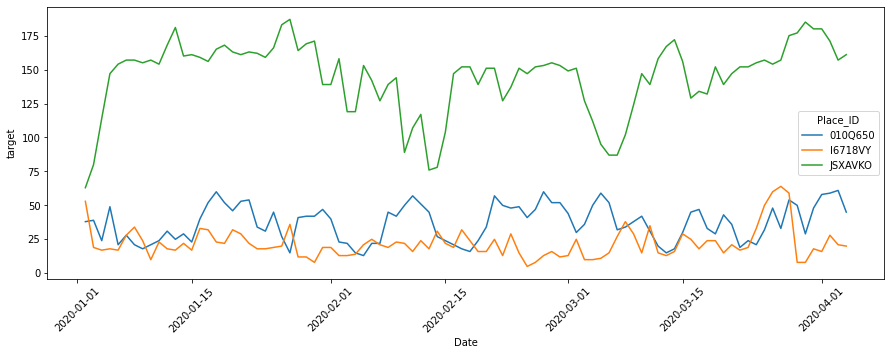

In [ ]:
places = ['010Q650', 'JSXAVKO', 'I6718VY']
data = train_eda[train_eda['Place_ID'].isin(places)]
plt.figure(figsize = (15,5))
ax = sns.lineplot(x ='Date', y = 'target', data = data, hue = 'Place_ID')
plt.xticks(rotation=45)
plt.title('Target Distribution Across Dates For Selected Places')

### Missing values check

create a function that checks if there is a missing values in a dataframe and plot the representation via a countplot

In [18]:
def check_missing(data):
  size = data.shape[0]
  missing = data.isnull().sum()[data.isnull().sum() > 0].sort_values()
  if not missing.empty :
    plot_missing(missing, size)
  else:
    print('This dataframe has no missing values')

def plot_missing(data : pd.Series, size):
  plt.figure(figsize =(7,10))
  plt.style.use('seaborn-darkgrid')
  plt.title('Missing Values Plot')
  ax = data.plot.barh(color = 'green')

  for p in ax.patches:
    percentage ='{:,.2f}%'.format((p.get_width()/size)*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

  plt.show()

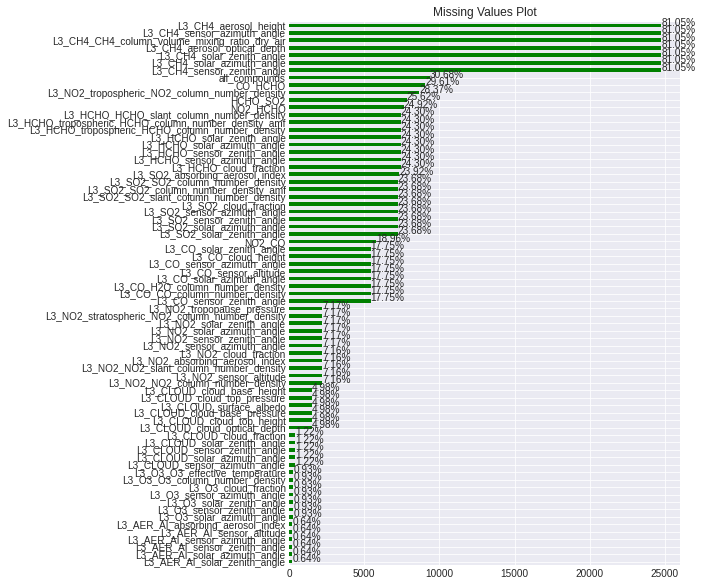

In [19]:
check_missing(train_eda) # plot missing value in train_data

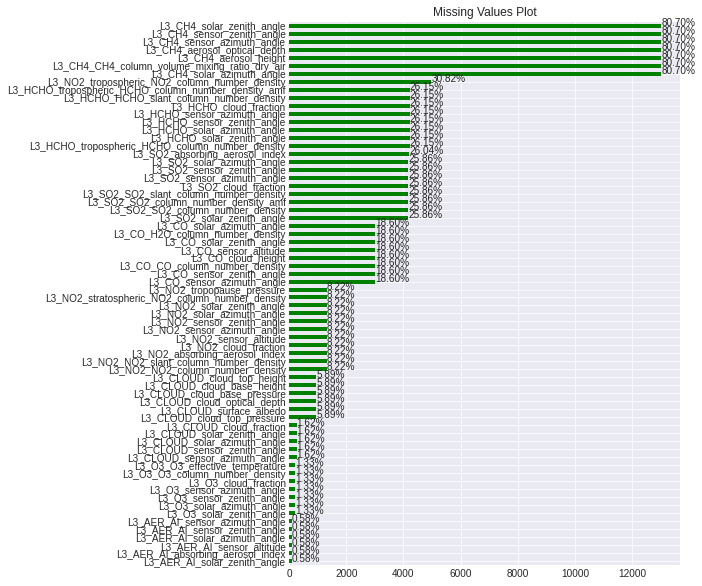

In [20]:
check_missing(test_eda)  # plot missing value in test_data

### Target Distribution

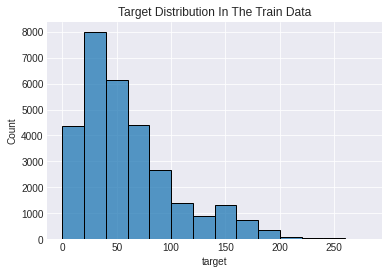

In [21]:
sns.histplot(x = 'target', data = train_eda,bins=range(0,300,20))
plt.title('Target Distribution In The Train Data')
plt.show()

### Correleration

Engineer new features like wind_speed, dew point etc and check how together with other columns affect the target variables

In [16]:
train_eda['Day'] = train_eda['Date'].dt.day
train_eda['wind_speed'] = (train_eda['u_component_of_wind_10m_above_ground']**2 + train_eda['v_component_of_wind_10m_above_ground']**2).map(lambda x : math.sqrt(x))
train_eda['Dew_point'] = train_eda['temperature_2m_above_ground'].apply(lambda x: (17.27 * x) / (237.7 + x)) + train_eda['specific_humidity_2m_above_ground'].apply(lambda x: math.log(x))
train_eda['Partial_pressure'] = (train_eda['temperature_2m_above_ground'].apply(lambda x: (237.7 + x) * 286.8) * train_eda['specific_humidity_2m_above_ground']) / 100000
train_eda['Saturated_wvd'] = (train_eda['specific_humidity_2m_above_ground'] * 100) / train_eda['relative_humidity_2m_above_ground']
train_eda['all_compounds'] = train_eda['L3_NO2_NO2_column_number_density'] + train_eda['L3_CO_CO_column_number_density'] + train_eda['L3_HCHO_HCHO_slant_column_number_density'] + train_eda['L3_SO2_SO2_column_number_density']
train_eda['NO2_CO'] = train_eda['L3_NO2_NO2_column_number_density'] + train_eda['L3_CO_CO_column_number_density']
train_eda['NO2_HCHO'] = train_eda['L3_NO2_NO2_column_number_density'] + train_eda['L3_HCHO_HCHO_slant_column_number_density']
train_eda['HCHO_SO2'] = train_eda['L3_HCHO_HCHO_slant_column_number_density'] + train_eda['L3_SO2_SO2_column_number_density']
train_eda['CO_HCHO'] = train_eda['L3_CO_CO_column_number_density'] + train_eda['L3_HCHO_HCHO_slant_column_number_density']


In [17]:
train_eda.corr()['target'].tail(50)

L3_HCHO_cloud_fraction                                -0.011736
L3_HCHO_sensor_azimuth_angle                           0.013455
L3_HCHO_sensor_zenith_angle                            0.008498
L3_HCHO_solar_azimuth_angle                           -0.181548
L3_HCHO_solar_zenith_angle                            -0.038851
L3_HCHO_tropospheric_HCHO_column_number_density        0.347125
L3_HCHO_tropospheric_HCHO_column_number_density_amf   -0.114348
L3_CLOUD_cloud_base_height                            -0.087670
L3_CLOUD_cloud_base_pressure                           0.097343
L3_CLOUD_cloud_fraction                               -0.113222
L3_CLOUD_cloud_optical_depth                          -0.118504
L3_CLOUD_cloud_top_height                             -0.106536
L3_CLOUD_cloud_top_pressure                            0.123855
L3_CLOUD_sensor_azimuth_angle                          0.003763
L3_CLOUD_sensor_zenith_angle                           0.007673
L3_CLOUD_solar_azimuth_angle            

#### Insights from EDA

* From the above we saw that  both train and test set came from the same distribution across dates but different locations :- This is an indication that we should used GroupFold Validation
* Wind speed is a good indicator for pm2.5.
* The methane based features had about 80% missing value. Further research showed that this is one of the main contributors to pm2.5 so dropping might slightly reduce performance.

## Modelling

In [22]:
# copies to use for modelling
train_data = train.copy()
test_data = test.copy()

### Validation

Being a regression task, the validation metrics to be used here is RMSE. We will use a GroupKfold validation since from the EDa saw that train and test test came from different places.

In [23]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupKFold, cross_val_score

In [24]:
cv = GroupKFold(n_splits = 5)
def validate(estimator, X, y, groups):
  '''function cross validates an estimatorunction cross validates an estimator'''
  scores = cross_val_score(estimator, X,y,
                           groups = groups, cv =cv, 
                           scoring= 'neg_root_mean_squared_error')
  return scores

In [25]:
def print_results(scores):
    '''Prints results across different folds'''
    folds = len(scores)
    print('RMSE ACROSS FOLDS\n')
    for i in range(folds):
      print(f'|fold {i+1} | rmse -> {-1 * scores[i]}')
    print(f'Mean RMSE accross the {folds} folds --> {-1 * scores.mean()}')
    print(f'Standard deviation of RMSE accross the {folds} folds --> {scores.std()}')


### Base Model


In [26]:
from sklearn.dummy import DummyRegressor

In [27]:
dummy = DummyRegressor(strategy= 'mean')
X_du = train_data.drop('target', axis = 1)
groups = train_data['Place_ID']
y_du = train_data['target']
scores = validate(estimator= dummy, X= X_du, y = y_du, groups = groups)
print_results(scores)

RMSE ACROSS FOLDS

|fold 1 | rmse -> 51.5289755371431
|fold 2 | rmse -> 46.96866473701397
|fold 3 | rmse -> 42.12943182059392
|fold 4 | rmse -> 49.33469953226178
|fold 5 | rmse -> 44.174574682556425
Mean RMSE accross the 5 folds --> 46.827269261913834
Standard deviation of RMSE accross the 5 folds --> 3.391746048747919


From the above, a model that simply predicts mean of the train target will have an RMSE of 46.8 +- 3.4

Lets build another base model with all numerical columns on random forest and inspect its performance

In [28]:
drop_columns = ['target', 'target_min', 'target_max', 'target_variance','target_count', 'Place_ID X Date', 'Place_ID','Date']
X = train_data.drop(drop_columns, axis = 1)
X = X.fillna(-1) # fill nan values as random forest cannot handle it
y = train_data['target']
forest = RandomForestRegressor(max_depth = 6)
scores = validate(estimator= forest , X= X, y = y, groups = groups)
print_results(scores)

RMSE ACROSS FOLDS

|fold 1 | rmse -> 39.70613706468787
|fold 2 | rmse -> 37.85490633878371
|fold 3 | rmse -> 32.4464620430074
|fold 4 | rmse -> 41.79830454342411
|fold 5 | rmse -> 34.18113212423335
Mean RMSE accross the 5 folds --> 37.19738842282729
Standard deviation of RMSE accross the 5 folds --> 3.4514832241193005


### Improving the base model

* Data Preprocessing and Feature Engineering
* Explore with different features
* Use Xgboost and LightGBM then compare


In [29]:
# create copies of train and test data
train_prep = train.copy()
test_prep = test.copy()

# divide train set into features and targets
target_columns = ['target', 'target_min', 'target_max', 'target_variance','target_count']
X = train_prep.drop(target_columns, axis = 1)
y = train_prep['target']

# optionally drop methane columns and check performance
# ch4_columns = [col for col in train_prep.columns if 'L3_CH4' in col] # CH4 columns contains about 80% values missing. Drop them
# train_columns = [col for col in X.columns if not any(x in col for x in ch4_columns)] # exclude CH4 columns

In [30]:
# feature engineering
#X = X[train_columns]
X['wind_speed'] = (X['u_component_of_wind_10m_above_ground']**2 + X['v_component_of_wind_10m_above_ground']**2).map(lambda x : math.sqrt(x))
X['Day'] = train['Date'].dt.dayofweek
X['Days'] = train['Date'].dt.day
X['all_compounds'] = X['L3_NO2_NO2_column_number_density'] + X['L3_CO_CO_column_number_density'] + X['L3_HCHO_HCHO_slant_column_number_density'] + X['L3_SO2_SO2_column_number_density']
X['NO2_CO'] = X['L3_NO2_NO2_column_number_density'] + X['L3_CO_CO_column_number_density']
X['NO2_HCHO'] = X['L3_NO2_NO2_column_number_density'] + X['L3_HCHO_HCHO_slant_column_number_density']
X['CO_HCHO'] = X['L3_CO_CO_column_number_density'] + X['L3_HCHO_HCHO_slant_column_number_density']


# allow xgboost and ightGBM handle missing values

#get groups for GroupKfold validation
groups = X['Place_ID']

# drop other columns not required
X = X.drop(['Place_ID X Date','Date','Place_ID'], axis = 1)
print(X.shape)

(30557, 81)


In [31]:
# create that does the above
def prep_features(X):
  #X = X.loc[:,train_columns]
  X['wind_speed'] = (X['u_component_of_wind_10m_above_ground']**2 + X['v_component_of_wind_10m_above_ground']**2).map(lambda x : math.sqrt(x))
  X['Day'] = train['Date'].dt.dayofweek
  X['Days'] = train['Date'].dt.day
  X['all_compounds'] = X['L3_NO2_NO2_column_number_density'] + X['L3_CO_CO_column_number_density'] + X['L3_HCHO_HCHO_slant_column_number_density'] + X['L3_SO2_SO2_column_number_density']
  X['NO2_CO'] = X['L3_NO2_NO2_column_number_density'] + X['L3_CO_CO_column_number_density']
  X['NO2_HCHO'] = X['L3_NO2_NO2_column_number_density'] + X['L3_HCHO_HCHO_slant_column_number_density']
  X['CO_HCHO'] = X['L3_CO_CO_column_number_density'] + X['L3_HCHO_HCHO_slant_column_number_density']

  X = X.drop(['Place_ID X Date','Date','Place_ID'], axis = 1)
  return(X)


In [32]:
# cross data on xgboost
xg_model = xgb.XGBRegressor(objective='reg:squarederror', max_depth = 8)
scores = validate(estimator= xg_model , X= X, y = y, groups = groups)
print_results(scores)

RMSE ACROSS FOLDS

|fold 1 | rmse -> 35.06180651439083
|fold 2 | rmse -> 31.88345400692106
|fold 3 | rmse -> 29.18034257680812
|fold 4 | rmse -> 37.509041743234555
|fold 5 | rmse -> 30.33065578051894
Mean RMSE accross the 5 folds --> 32.7930601243747
Standard deviation of RMSE accross the 5 folds --> 3.076694308236668


In [33]:
# cross validation on lgb model
lgb_model = lgb.LGBMRegressor(n_estimators= 1000, random_state = 42)
scores = validate(estimator= lgb_model , X= X, y = y, groups = groups)
print_results(scores)

RMSE ACROSS FOLDS

|fold 1 | rmse -> 33.71725400202457
|fold 2 | rmse -> 30.937161786031997
|fold 3 | rmse -> 28.462884733387924
|fold 4 | rmse -> 36.48096741672927
|fold 5 | rmse -> 29.273082735273988
Mean RMSE accross the 5 folds --> 31.77427013468955
Standard deviation of RMSE accross the 5 folds --> 2.9614235659164034


Both LightGBM and Xgboost performed better than the base models above with LightGbm slightly better than Xgboost. Further Work will be put to optimize the lightgbm.

In [34]:
# define function that creates a submission file
def submit(file_name, predictions):
  sample_sub = pd.DataFrame({'Place_ID X Date': test_prep['Place_ID X Date'], 'target': predictions})
  sample_sub.to_csv(file_name, index=False)

In [35]:
# process test set
X_test = prep_features(test_prep)
print(X_test.shape, X.shape)

(16136, 81) (30557, 81)


#### GroupKfoldSubmission with Xgboost

In [36]:
oof = np.zeros(len(X))
sub = np.zeros(len(X_test))
scores = [0 for _ in range(cv.get_n_splits())]
for fold_, (train_idx, val_idx) in enumerate(cv.split(X, y, groups)):
    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_val, y_val = X.loc[val_idx], y.loc[val_idx]
    regressor = xgb.XGBRegressor(max_depth = 8)
    regressor.fit(X_train, y_train) 
    oof[val_idx] = regressor.predict(X_val) 
    sub += regressor.predict(X_test)/cv.get_n_splits()
    scores[fold_] = mean_squared_error(y[val_idx], oof[val_idx], squared=False)
    print("Fold {}: {}".format(fold_+1, round(scores[fold_],5)))
    
print("CV score(RMSE): {:<8.5f}, (std: {:<8.5f})".format( mean_squared_error(y, oof, squared=False), np.std(scores)))

[09:11:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 1: 35.06181
[09:11:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 2: 31.88345
[09:12:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 3: 29.18034
[09:12:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 4: 37.50904
[09:13:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fold 5: 30.33066
CV score(RMSE): 32.93457, (std: 3.07669 )


In [37]:
submit('predictionxg1', sub) # make submission with xgboost

#### GropKFoldSubmission with LightGBM

In [38]:
params = {'learning_rate': 0.06,
              'num_leaves': 31,
              'verbosity': -1,
              'n_estimators':2000,
              'objective' : 'regression',
              'metric': 'root_mean_squared_error',
              'data_random_seed': 2,
              'early_stopping_rounds':150,
              'bagging_fraction': 0.8,
              'feature_fraction': 0.8,
              'nthread': 4,
              'lambda_l1': 1,
              'lambda_l2': 1}

In [39]:
oof = np.zeros(len(X))
sub = np.zeros(len(X_test))
scores = [0 for _ in range(cv.get_n_splits())]
for fold_, (train_idx, val_idx) in enumerate(cv.split(X, y, groups)):
    X_train, y_train = X.loc[train_idx], y.loc[train_idx]
    X_val, y_val = X.loc[val_idx], y.loc[val_idx]
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val)
    watchlist = [train_data, val_data]
    lgb_model = lgb.train(params, train_set = train_data, valid_sets=watchlist)
    oof[val_idx] = lgb_model.predict(X_val) 
    sub += lgb_model.predict(X_test)/cv.get_n_splits()
    scores[fold_] = mean_squared_error(y[val_idx], oof[val_idx], squared=False)
    print("Fold {}: {}".format(fold_+1, round(scores[fold_],5)))
    
print("CV score(RMSE): {:<8.5f}, (std: {:<8.5f})".format( mean_squared_error(y, oof, squared=False), np.std(scores)))

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 44.6111	valid_1's rmse: 50.4861
Training until validation scores don't improve for 150 rounds.
[2]	training's rmse: 43.7249	valid_1's rmse: 49.5858
[3]	training's rmse: 42.8855	valid_1's rmse: 48.7154
[4]	training's rmse: 42.0874	valid_1's rmse: 47.8598
[5]	training's rmse: 41.3308	valid_1's rmse: 47.1532
[6]	training's rmse: 40.652	valid_1's rmse: 46.4201
[7]	training's rmse: 40.0184	valid_1's rmse: 45.783
[8]	training's rmse: 39.4413	valid_1's rmse: 45.1792
[9]	training's rmse: 38.8854	valid_1's rmse: 44.6021
[10]	training's rmse: 38.384	valid_1's rmse: 44.1008
[11]	training's rmse: 37.9599	valid_1's rmse: 43.623
[12]	training's rmse: 37.498	valid_1's rmse: 43.1915
[13]	training's rmse: 37.0614	valid_1's rmse: 42.79
[14]	training's rmse: 36.7064	valid_1's rmse: 42.3999
[15]	training's rmse: 36.3369	valid_1's rmse: 42.0777
[16]	training's rmse: 35.9817	valid_1's rmse: 41.7533
[17]	training's rmse: 35.6745	valid_1's rmse: 41.4066
[18]	training's rmse: 35.3878	valid

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.7677	valid_1's rmse: 46.0743
Training until validation scores don't improve for 150 rounds.
[2]	training's rmse: 44.7768	valid_1's rmse: 45.2772
[3]	training's rmse: 43.8746	valid_1's rmse: 44.5575
[4]	training's rmse: 42.9872	valid_1's rmse: 43.8345
[5]	training's rmse: 42.1902	valid_1's rmse: 43.2044
[6]	training's rmse: 41.4308	valid_1's rmse: 42.6112
[7]	training's rmse: 40.7424	valid_1's rmse: 42.0645
[8]	training's rmse: 40.0952	valid_1's rmse: 41.6013
[9]	training's rmse: 39.5067	valid_1's rmse: 41.13
[10]	training's rmse: 38.9651	valid_1's rmse: 40.6834
[11]	training's rmse: 38.4983	valid_1's rmse: 40.2978
[12]	training's rmse: 38.0247	valid_1's rmse: 39.9079
[13]	training's rmse: 37.6036	valid_1's rmse: 39.6352
[14]	training's rmse: 37.2221	valid_1's rmse: 39.3496
[15]	training's rmse: 36.8355	valid_1's rmse: 39.0582
[16]	training's rmse: 36.4997	valid_1's rmse: 38.8198
[17]	training's rmse: 36.1684	valid_1's rmse: 38.5918
[18]	training's rmse: 35.8667	

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 46.8495	valid_1's rmse: 41.0723
Training until validation scores don't improve for 150 rounds.
[2]	training's rmse: 45.8785	valid_1's rmse: 40.2088
[3]	training's rmse: 44.9755	valid_1's rmse: 39.4675
[4]	training's rmse: 44.1012	valid_1's rmse: 38.731
[5]	training's rmse: 43.3087	valid_1's rmse: 38.0854
[6]	training's rmse: 42.5563	valid_1's rmse: 37.428
[7]	training's rmse: 41.8754	valid_1's rmse: 36.8794
[8]	training's rmse: 41.2536	valid_1's rmse: 36.3813
[9]	training's rmse: 40.6569	valid_1's rmse: 35.9076
[10]	training's rmse: 40.0462	valid_1's rmse: 35.4873
[11]	training's rmse: 39.5513	valid_1's rmse: 35.1388
[12]	training's rmse: 39.0324	valid_1's rmse: 34.7293
[13]	training's rmse: 38.5702	valid_1's rmse: 34.4009
[14]	training's rmse: 38.1621	valid_1's rmse: 34.0815
[15]	training's rmse: 37.7417	valid_1's rmse: 33.8128
[16]	training's rmse: 37.3852	valid_1's rmse: 33.5794
[17]	training's rmse: 37.018	valid_1's rmse: 33.3167
[18]	training's rmse: 36.6888	v

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 45.1053	valid_1's rmse: 48.4892
Training until validation scores don't improve for 150 rounds.
[2]	training's rmse: 44.1022	valid_1's rmse: 47.7777
[3]	training's rmse: 43.148	valid_1's rmse: 47.1226
[4]	training's rmse: 42.2453	valid_1's rmse: 46.524
[5]	training's rmse: 41.4222	valid_1's rmse: 45.9574
[6]	training's rmse: 40.6426	valid_1's rmse: 45.4497
[7]	training's rmse: 39.9342	valid_1's rmse: 45.0162
[8]	training's rmse: 39.2595	valid_1's rmse: 44.5734
[9]	training's rmse: 38.6399	valid_1's rmse: 44.2489
[10]	training's rmse: 38.069	valid_1's rmse: 43.8814
[11]	training's rmse: 37.579	valid_1's rmse: 43.5452
[12]	training's rmse: 37.0924	valid_1's rmse: 43.2598
[13]	training's rmse: 36.5996	valid_1's rmse: 42.9489
[14]	training's rmse: 36.1978	valid_1's rmse: 42.6991
[15]	training's rmse: 35.7741	valid_1's rmse: 42.4267
[16]	training's rmse: 35.4092	valid_1's rmse: 42.1825
[17]	training's rmse: 35.0375	valid_1's rmse: 42.0057
[18]	training's rmse: 34.7296	va

/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's rmse: 46.4444	valid_1's rmse: 43.2725
Training until validation scores don't improve for 150 rounds.
[2]	training's rmse: 45.4965	valid_1's rmse: 42.4904
[3]	training's rmse: 44.6189	valid_1's rmse: 41.7483
[4]	training's rmse: 43.7613	valid_1's rmse: 41.0348
[5]	training's rmse: 42.9474	valid_1's rmse: 40.3929
[6]	training's rmse: 42.2157	valid_1's rmse: 39.8122
[7]	training's rmse: 41.5214	valid_1's rmse: 39.264
[8]	training's rmse: 40.8495	valid_1's rmse: 38.6786
[9]	training's rmse: 40.2508	valid_1's rmse: 38.2128
[10]	training's rmse: 39.6744	valid_1's rmse: 37.7743
[11]	training's rmse: 39.1705	valid_1's rmse: 37.4012
[12]	training's rmse: 38.7071	valid_1's rmse: 37.0265
[13]	training's rmse: 38.2417	valid_1's rmse: 36.6616
[14]	training's rmse: 37.8396	valid_1's rmse: 36.3607
[15]	training's rmse: 37.4272	valid_1's rmse: 36.0869
[16]	training's rmse: 37.0584	valid_1's rmse: 35.8125
[17]	training's rmse: 36.7295	valid_1's rmse: 35.5539
[18]	training's rmse: 36.4115

In [40]:
submit('predictionlgm8.csv', sub) # make submission with ligtgbm

#### Summary of results

| Model                                | RMSE        | STD |
|--------------------------------------|------------|-----------|
|Dummy Regressor (Base model 1)       | 46.827        |3.392|
|RandomforestRegressor (Base model 2)       | 37.197  |3.450|
|Xgboost Regressor with FE       | 32.793        |3.077|
|LightGBM with FE       | 31.774        |2.962|
|Hand-tuned LightGBM with FE       |31.565      |2.974|
